In [1]:
import pandas as pd
from datetime import datetime

# Define the column names as provided
column_names = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']

# Load the data with proper column names
df = pd.read_csv('data/data.txt', sep=' ', header=None, names=column_names)

# Function to parse the time with fallback for different formats
def parse_time(time_str):
    try:
        return datetime.strptime(time_str, '%H:%M:%S.%f').time()
    except ValueError:
        try:
            return datetime.strptime(time_str, '%H:%M:%S').time()
        except ValueError:
            return None

# Apply the function to the 'time' column
df['time'] = df['time'].apply(parse_time)

# Ensure the 'date' column is parsed correctly
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce').dt.date

# Ensure correct data types for other columns
df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce').astype('Int64')
df['moteid'] = pd.to_numeric(df['moteid'], errors='coerce').astype('Int64')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
df['light'] = pd.to_numeric(df['light'], errors='coerce')
df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')

# Print the last few rows of the dataframe to verify
print(df.head())

# Optionally, handle any rows where the date or time could not be parsed
invalid_dates = df[df['date'].isna()]
invalid_times = df[df['time'].isna()]

print("Rows with invalid dates:")
print(invalid_dates)

print("Rows with invalid times:")
print(invalid_times)

         date             time  epoch  moteid  temperature  humidity  light  \
0  2004-03-31  03:38:15.757551      2       1     122.1530  -3.91901  11.04   
1  2004-02-28  00:59:16.027850      3       1      19.9884  37.09330  45.08   
2  2004-02-28  01:03:16.333930     11       1      19.3024  38.46290  45.08   
3  2004-02-28  01:06:16.013453     17       1      19.1652  38.80390  45.08   
4  2004-02-28  01:06:46.778088     18       1      19.1750  38.83790  45.08   

   voltage  
0  2.03397  
1  2.69964  
2  2.68742  
3  2.68742  
4  2.69964  
Rows with invalid dates:
Empty DataFrame
Columns: [date, time, epoch, moteid, temperature, humidity, light, voltage]
Index: []
Rows with invalid times:
Empty DataFrame
Columns: [date, time, epoch, moteid, temperature, humidity, light, voltage]
Index: []


In [2]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# Parse the 'time' column dynamically
df['time'] = pd.to_datetime(df['time'], errors='coerce', format='%H:%M:%S.%f').dt.time
df['time'] = df['time'].fillna(pd.to_datetime(df['time'], errors='coerce', format='%H:%M:%S').dt.time)

In [3]:
# Remove rows where 'time' could not be parsed (NaT values)
df = df.dropna(subset=['time'])

In [4]:
# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

In [5]:
df = df[df['temperature'] <= 40]

In [6]:
import pandas as pd

# Assuming df is your existing DataFrame with a 'datetime' column and 'moteid'

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for mote IDs outside the expected range (1 to 54)
unexpected_moteids = df[~df['moteid'].isin(range(1, 55))]
if not unexpected_moteids.empty:
    print("Rows with unexpected mote IDs:")
    print(unexpected_moteids)

# Filter the DataFrame to keep only the mote IDs within the expected range
df = df[df['moteid'].isin(range(1, 55))]

# Identify mote IDs that have no values
motes_with_values = df.groupby('moteid')['temperature'].count()
motes_to_keep = motes_with_values[motes_with_values > 0].index.tolist()

# Filter the DataFrame to keep only the mote IDs with values
filtered_df = df[df['moteid'].isin(motes_to_keep)]

# Re-number the mote IDs from 1 to N
moteid_mapping = {old_id: new_id for new_id, old_id in enumerate(motes_to_keep, start=1)}
filtered_df['moteid'] = filtered_df['moteid'].map(moteid_mapping)

# Reset index to ensure the DataFrame is clean
filtered_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(filtered_df.head())

# Get a count of unique moteid
unique_moteid_count = filtered_df['moteid'].nunique()
print(f'Unique moteid count: {unique_moteid_count}')


Rows with unexpected mote IDs:
              date             time  epoch  moteid  temperature  humidity  \
2303290 2004-03-11  16:52:19.794238      2      55      26.2114   43.4524   
2303291 2004-03-12  09:15:21.526642      2      55      22.0170   41.7805   
2303292 2004-03-11  17:19:23.925033      2      55      25.4274   33.3507   
2303293 2004-03-11  17:15:52.136107      2      55      25.0158   33.9790   
2303294 2004-03-11  16:53:15.807424      4      55      26.2800   35.2995   
...            ...              ...    ...     ...          ...       ...   
2313149 2004-04-02  09:07:22.173243  62423      58      24.1436   21.7310   
2313150 2004-04-02  09:07:52.313870  62424      58      24.1436   21.6575   
2313151 2004-04-02  09:08:52.189274  62426      58      24.1240   21.5839   
2313152 2004-04-02  09:09:22.206544  62427      58      24.1044   21.4367   
2313154 2004-03-09  15:04:42.202647  30493   33117     -36.2048       NaN   

           light   voltage                  

In [7]:
filtered_df['humidity'].mean()

39.300728996909

In [24]:
import pandas as pd

# Assuming df is your existing DataFrame with a 'datetime' column and 'moteid'

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for mote IDs outside the expected range (1 to 54)
unexpected_moteids = df[~df['moteid'].isin(range(1, 55))]
if not unexpected_moteids.empty:
    print("Rows with unexpected mote IDs:")
    print(unexpected_moteids)
    # Optionally, drop these rows
    df = df[df['moteid'].isin(range(1, 55))]

# Identify mote IDs that have no values
motes_with_values = df.groupby('moteid')['temperature'].count()
motes_to_keep = motes_with_values[motes_with_values > 0].index.tolist()

# Filter the DataFrame to keep only the mote IDs with values
filtered_df = df[df['moteid'].isin(motes_to_keep)]

# Re-number the mote IDs from 1 to N
moteid_mapping = {old_id: new_id for new_id, old_id in enumerate(motes_to_keep, start=1)}
filtered_df['moteid'] = filtered_df['moteid'].map(moteid_mapping)

# Reset index to ensure the DataFrame is clean
filtered_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(filtered_df.tail())

# Get a count of unique moteid
unique_moteid_count = filtered_df['moteid'].nunique()
print(f'Unique moteid count: {unique_moteid_count}')


              date             time  epoch  moteid  temperature  humidity  \
1887403 2004-03-21  18:53:27.558979  65510      53      21.4780   47.6361   
1887404 2004-03-21  18:54:43.117051  65512      53      21.4780   47.6361   
1887405 2004-03-21  18:57:30.336879  65518      53      21.4192   47.6687   
1887406 2004-03-21  18:59:36.673512  65522      53      21.3996   47.7013   
1887407 2004-03-21  19:02:56.249587  65529      53      21.3604   47.8315   

         light  voltage                   datetime  
1887403   0.46  2.35683 2004-03-21 18:53:27.558979  
1887404   0.46  2.34751 2004-03-21 18:54:43.117051  
1887405   0.46  2.34751 2004-03-21 18:57:30.336879  
1887406   0.46  2.34751 2004-03-21 18:59:36.673512  
1887407   0.46  2.34751 2004-03-21 19:02:56.249587  
Unique moteid count: 53


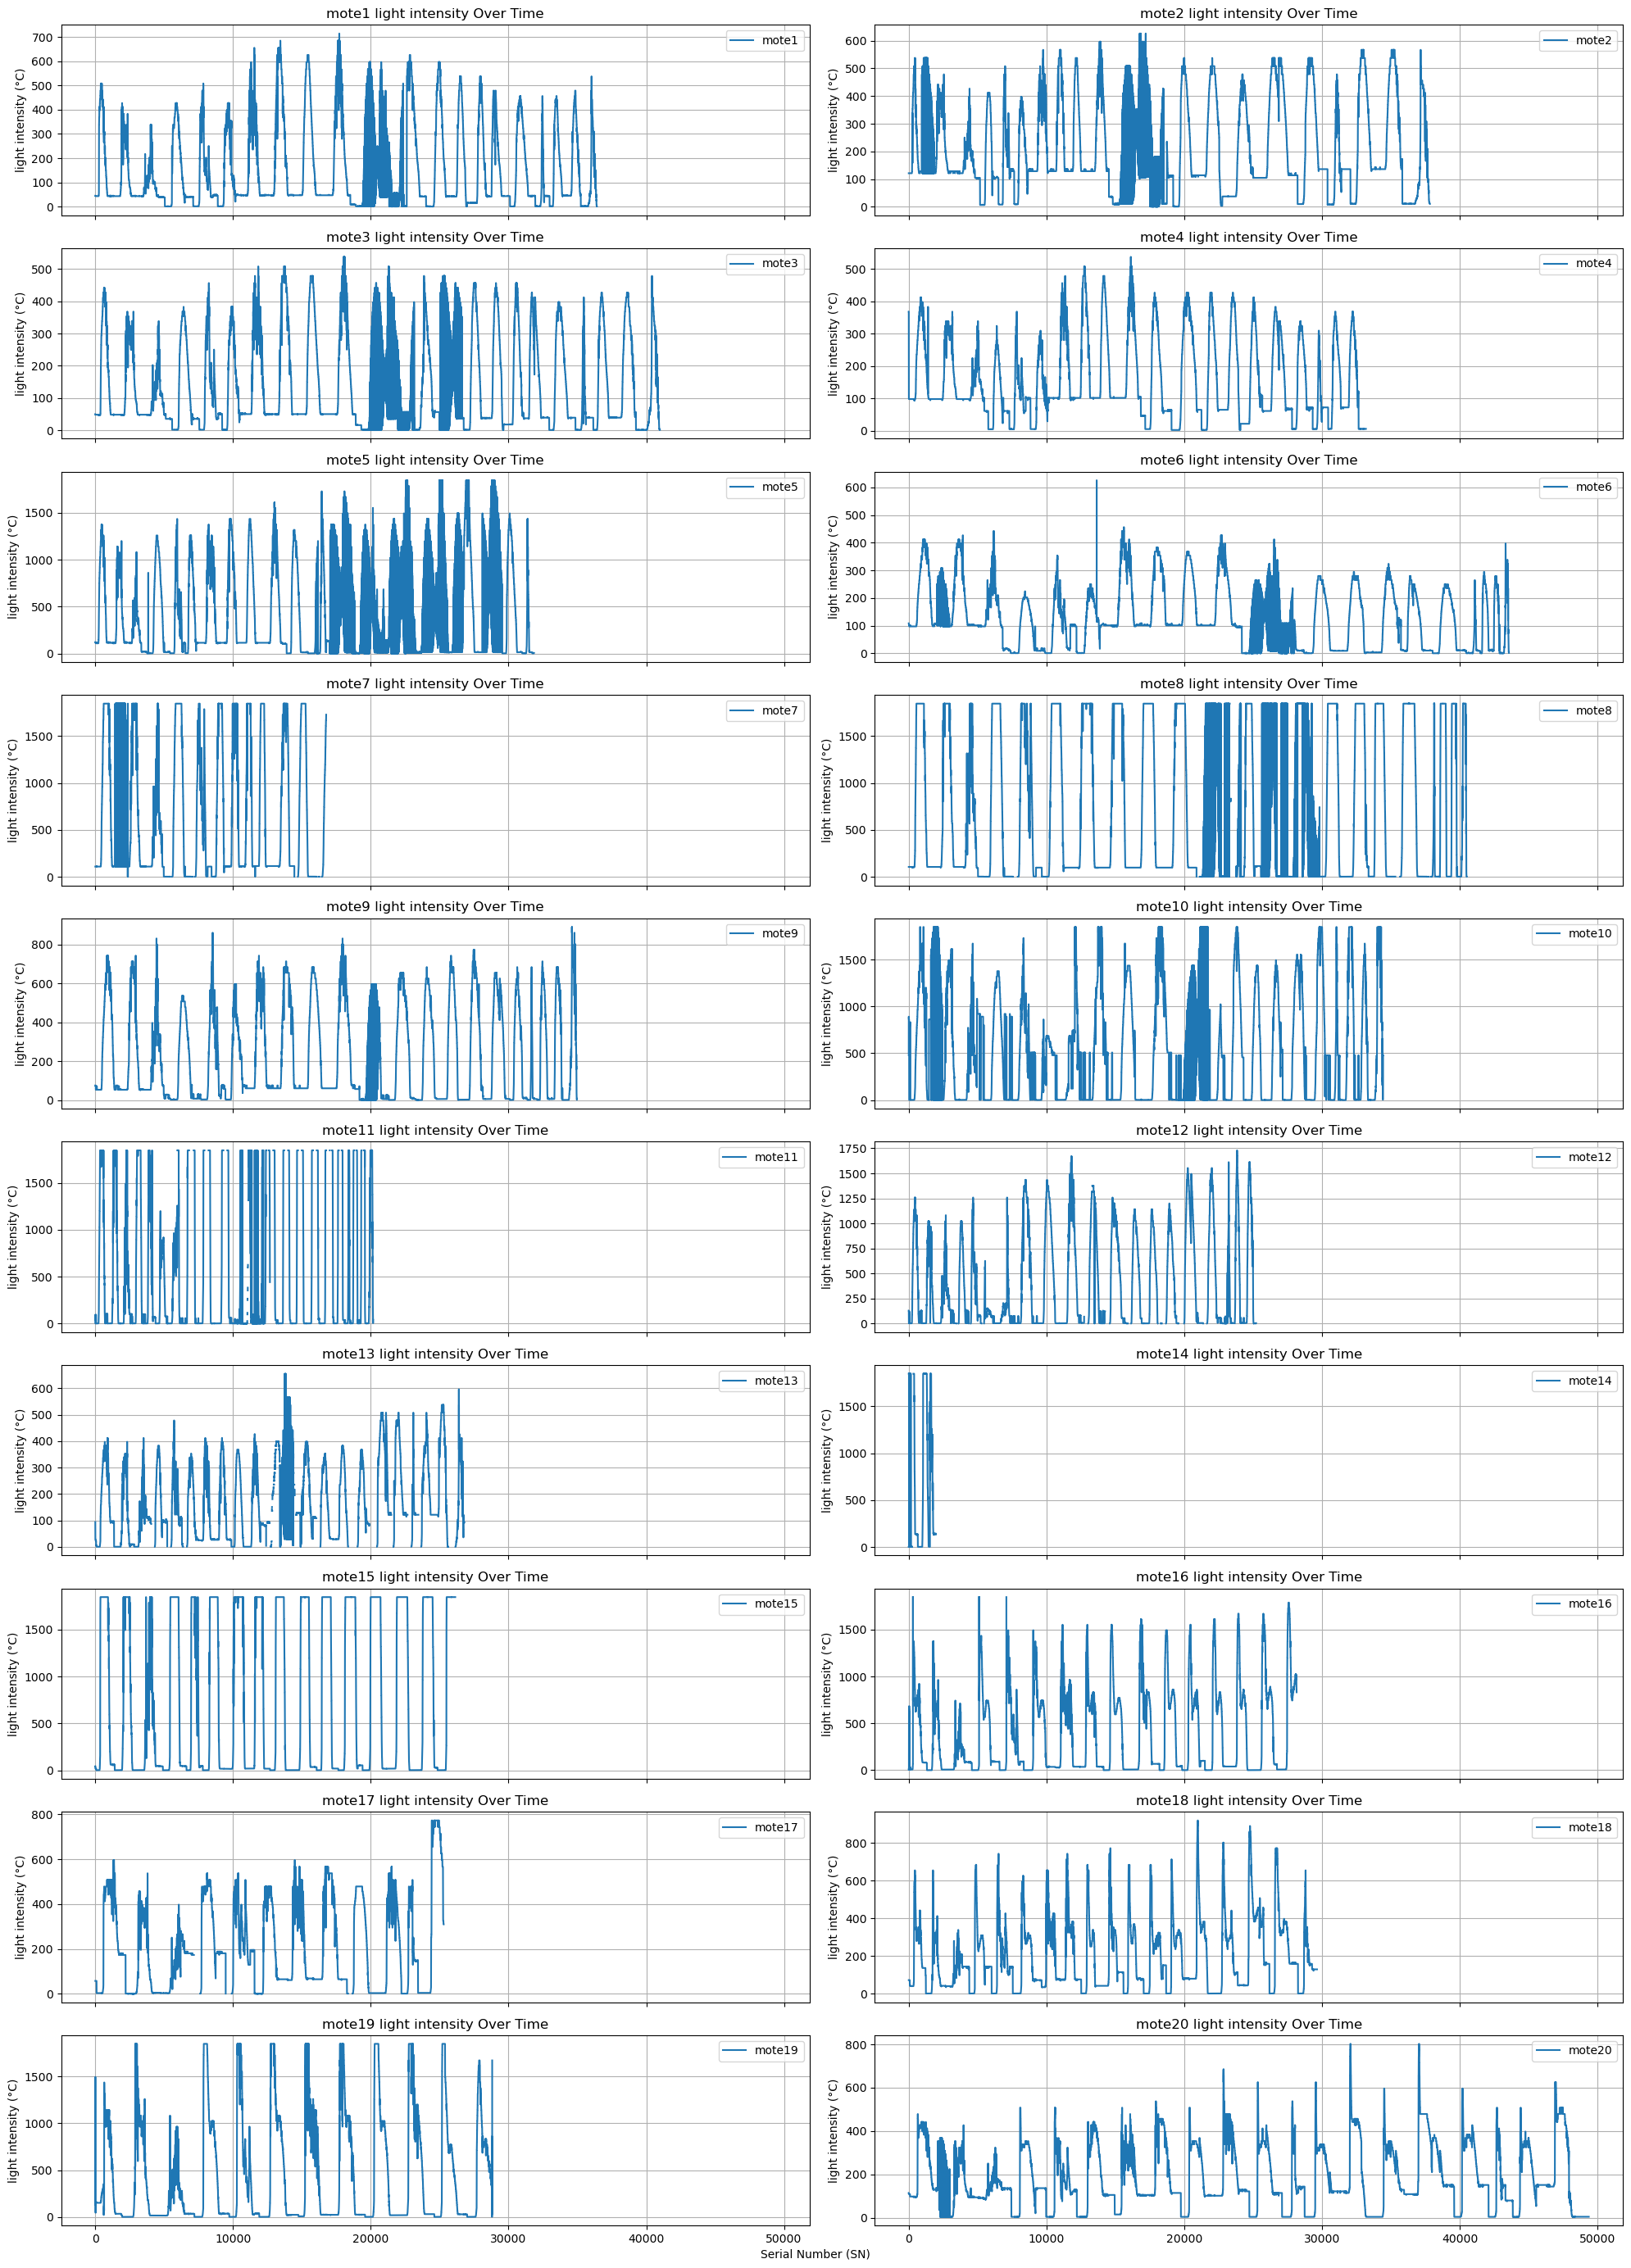

: 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Get the top 20 mote IDs (assuming they are in the range 1 to 54)
top_50_moteids = filtered_df['moteid'].unique()[:50]

# Re-number the mote IDs from 1 to 20
moteid_mapping = {old_id: new_id for new_id, old_id in enumerate(top_50_moteids, start=1)}
filtered_df['moteid'] = filtered_df['moteid'].map(moteid_mapping)

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate over each specified moteid and get the first 5000 temperature values
for moteid in range(1, 51):
    mote_df = filtered_df[filtered_df['moteid'] == moteid]
    temp_df = mote_df[['light']].reset_index(drop=True)
    temp_df.columns = [f'mote{moteid}']
    if result_df.empty:
        result_df = temp_df
    else:
        result_df = pd.concat([result_df, temp_df], axis=1)

# Add the serial number (SN) column
result_df.insert(0, 'SN', range(1, len(result_df) + 1))

# Save the DataFrame to a CSV file
result_df.to_csv('top_fifty_motes_light.csv', index=False)

# Plotting the temperature values for each mote in separate subplots
fig, axs = plt.subplots(10, 2, figsize=(20, 30), sharex=True)

for i in range(20):
    mote = f'mote{i+1}'
    row = i // 2
    col = i % 2
    axs[row, col].plot(result_df['SN'], result_df[mote], label=mote)
    axs[row, col].set_ylabel('light intensity (°C)')
    axs[row, col].set_title(f'{mote} light intensity Over Time')
    axs[row, col].legend()
    axs[row, col].grid(True)

fig.text(0.5, 0.04, 'Serial Number (SN)', ha='center')
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.show()


Force pulling mote: mote1 at time step: 200
Force pulling mote: mote2 at time step: 270
Force pulling mote: mote11 at time step: 299
Force pulling mote: mote3 at time step: 315
Force pulling mote: mote5 at time step: 327
Force pulling mote: mote14 at time step: 345
Force pulling mote: mote9 at time step: 356
Force pulling mote: mote10 at time step: 357
Force pulling mote: mote15 at time step: 373
Force pulling mote: mote13 at time step: 459
Force pulling mote: mote20 at time step: 460
Force pulling mote: mote1 at time step: 543
Force pulling mote: mote18 at time step: 658
Force pulling mote: mote20 at time step: 681
Force pulling mote: mote7 at time step: 711
Force pulling mote: mote3 at time step: 729
Force pulling mote: mote2 at time step: 783
Force pulling mote: mote9 at time step: 784
Force pulling mote: mote4 at time step: 786
Force pulling mote: mote16 at time step: 814
Force pulling mote: mote8 at time step: 815
Force pulling mote: mote11 at time step: 831
Force pulling mote: mo

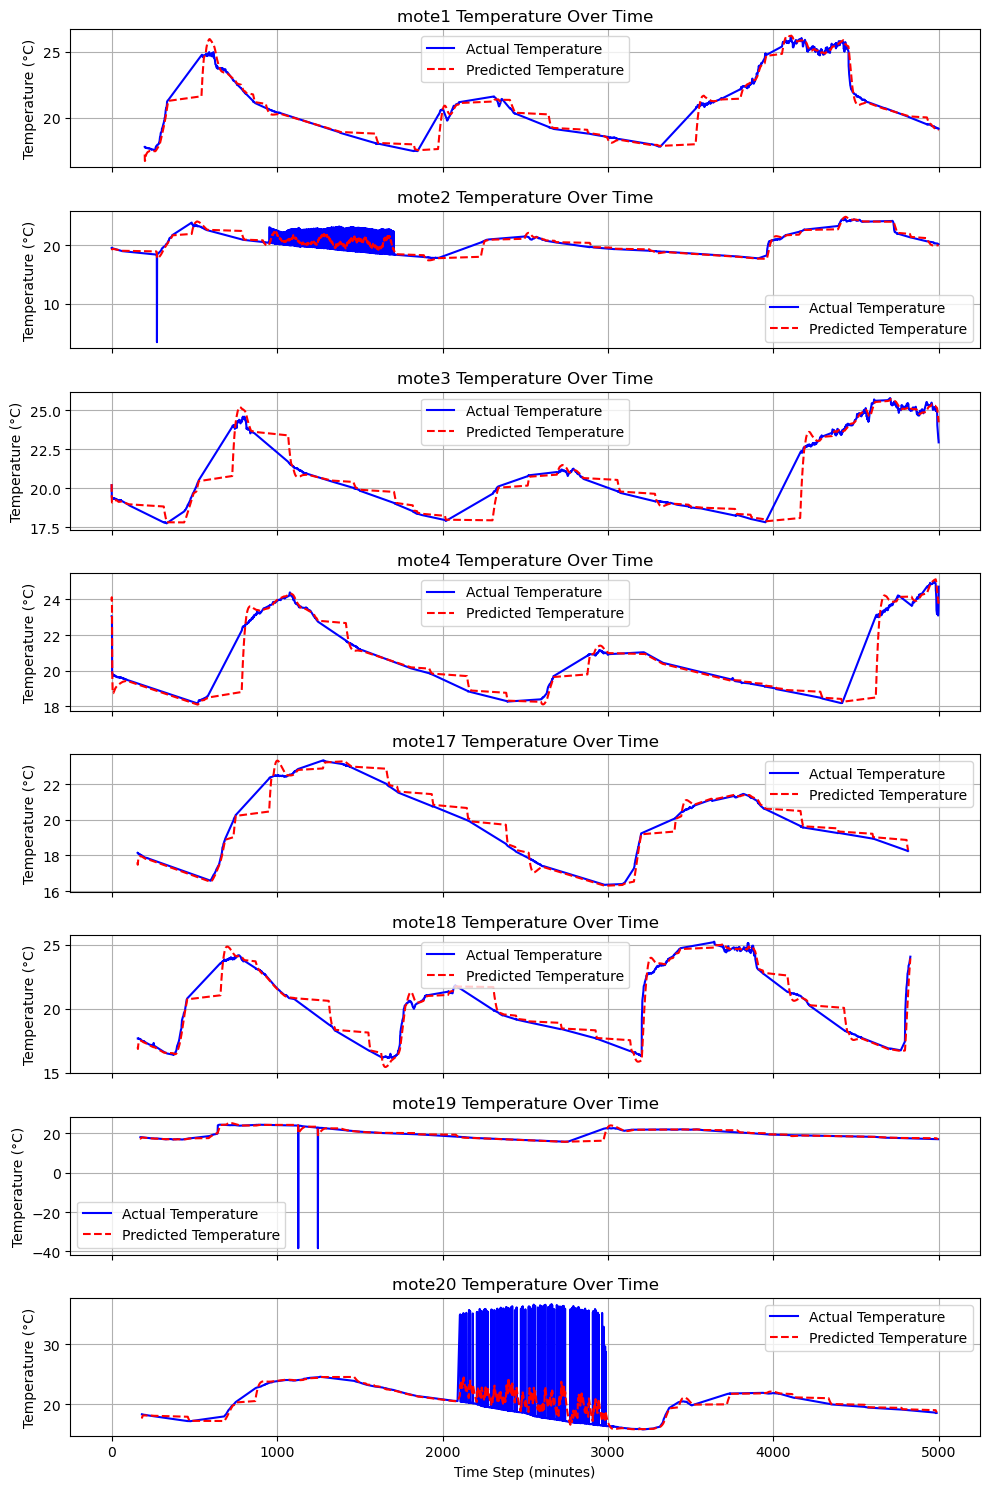

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the pivot DataFrame
pivot_df = result_df
pivot_df = pivot_df.head(5000)

# Parameters
A = np.array([[1, 1], [0, 1]])       # State transition matrix with delta_t=32 seconds
H = np.array([[1, 0]])                # Measurement matrix
Q = np.array([[1e-5, 0], [0, 1e-5]])  # Process noise covariance
R = np.array([[2]])                   # Measurement noise covariance
epsilon = 0.05                        # Sensitivity threshold for event detection
theta = 0.05                          # Threshold for significant change
num_nodes_to_poll = 10                 # Number of nodes to poll at each timestep
force_pull_threshold = 200             # Forcefully pull a node if it hasn't been pulled in the last 10 time steps

# Energy parameters in Joules
E_max = 162000  # Battery capacity in Joules
E_t = 50 / 1000  # Transmission energy in Joules
E_s = 10 / 1000  # Sensing energy in Joules
E_w = 10 / 1000  # Wake-up energy in Joules
E_0 = 1 / 1000   # Sleep energy in Joules

# Initialize state estimates and rate of change for each mote
state_estimates = {f'mote{i}': np.array([[20], [0.01]]) for i in range(1, 21)}
P = {f'mote{i}': np.eye(2) * 6 for i in range(1, 21)}

# Initialize previous timestamps for delta time calculation
last_sensed_values = {f'mote{i}': 20.0 for i in range(1, 21)}
last_update_times = {f'mote{i}': 0 for i in range(1, 21)}

# Initialize a list to store the most valuable sensor data and the associated metadata
valuable_sensor_data = []

# Initialize tracking arrays
polled_count = {f'mote{i}': 0 for i in range(1, 21)}
transmitted_count = {f'mote{i}': 0 for i in range(1, 21)}

# Function to predict node state
def predict_node_state(x_hat, delta_t):
    return A @ x_hat

# Function to select sensors based on predicted changes
def select_top_nodes(state_estimates, last_sensed_values, num_nodes_to_poll, delta_t_global, currently_polled_nodes):
    predicted_values = {mote: predict_node_state(state_estimates[mote], delta_t_global)[0, 0] for mote in state_estimates}
    value_changes = {mote: abs(predicted_values[mote] - last_sensed_values[mote]) for mote in state_estimates}
    top_nodes = sorted(value_changes, key=value_changes.get, reverse=True)
    # Filter out nodes that are already polled in this iteration
    top_nodes = [node for node in top_nodes if node not in currently_polled_nodes][:num_nodes_to_poll]
    return top_nodes

# Simulation loop
for idx, row in pivot_df.iterrows():
    current_time_step = idx
    delta_t_global = current_time_step - min(last_update_times.values())
    
    currently_polled_nodes = set()

    # Check if any node needs to be forcefully pulled due to inactivity
    for mote, last_time in last_update_times.items():
        if current_time_step - last_time >= force_pull_threshold:
            currently_polled_nodes.add(mote)
            print(f"Force pulling mote: {mote} at time step: {current_time_step}")

    # Predict the sensor with the most significant changes
    top_sensors = select_top_nodes(state_estimates, last_sensed_values, num_nodes_to_poll, delta_t_global, currently_polled_nodes)

    # Include forced pull nodes in the top sensors list
    top_sensors = list(currently_polled_nodes) + top_sensors

    for mote in top_sensors:
        polled_count[mote] += 1
        measured_value = row[mote]
        previous_state = state_estimates[mote]
        previous_P = P[mote]
        delta_t = max(current_time_step - last_update_times[mote], 1)  # Default to 1 if first measurement

        # Prediction step
        xp = A @ previous_state
        Pp = A @ previous_P @ A.T + Q

        # Update step
        z = np.array([[measured_value]])
        K = Pp @ H.T @ np.linalg.inv(H @ Pp @ H.T + R)
        x_hat = xp + K @ (z - H @ xp)
        P_hat = Pp - K @ H @ Pp

        # Store the updated state estimates and covariance matrix
        state_estimates[mote] = x_hat
        P[mote] = P_hat

        predicted_measurement = predict_node_state(x_hat, delta_t)[0, 0]

        if abs(measured_value - predicted_measurement) > theta:
            transmitted_count[mote] += 1
            last_sensed_values[mote] = measured_value

            # Store the data
            valuable_sensor_data.append({
                'index': current_time_step,
                'selected_moteid': mote,
                'temperature': measured_value,
                'predicted_temperature': predicted_measurement,
                'time_elapsed': delta_t
            })

        # Mark this node as polled in the current iteration
        currently_polled_nodes.add(mote)

    # Update the last selected index for the most valuable mote
    for mote in top_sensors:
        last_update_times[mote] = current_time_step

# Convert the list to a DataFrame
valuable_sensor_df = pd.DataFrame(valuable_sensor_data)

# Calculate the average MSE
valuable_sensor_df['squared_error'] = (valuable_sensor_df['temperature'] - valuable_sensor_df['predicted_temperature']) ** 2
average_mse = valuable_sensor_df['squared_error'].mean()
print(f'Average MSE: {average_mse}')

# Calculate polling and transmission fractions
time_steps = len(pivot_df)
fw = {mote: polled_count[mote] / time_steps for mote in polled_count}
ft = {mote: transmitted_count[mote] / time_steps for mote in transmitted_count}

# Calculate the average lifetime of sensors in hours and years
average_lifetime_hours = np.mean([
    E_max / (ft[mote] * E_t + fw[mote] * (E_s + 3 * E_w) + (1 - fw[mote]) * E_0) for mote in polled_count
]) / 3600

average_lifetime_years = average_lifetime_hours / 8760  # Convert hours to years
print("Average sensor lifetime (years):", average_lifetime_years)

# Plot the actual and predicted temperatures for each mote
fig, axs = plt.subplots(8, 1, figsize=(10, 15), sharex=True)

for i, mote in enumerate(['mote1', 'mote2', 'mote3', 'mote4','mote17','mote18','mote19','mote20']):
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[i].plot(mote_data['index'], mote_data['temperature'], 'b-', label='Actual Temperature')
    axs[i].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label='Predicted Temperature')
    axs[i].set_title(f'{mote} Temperature Over Time')
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Time Step (minutes)')
plt.tight_layout()
plt.show()

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_top_20_df.csv', index=False)


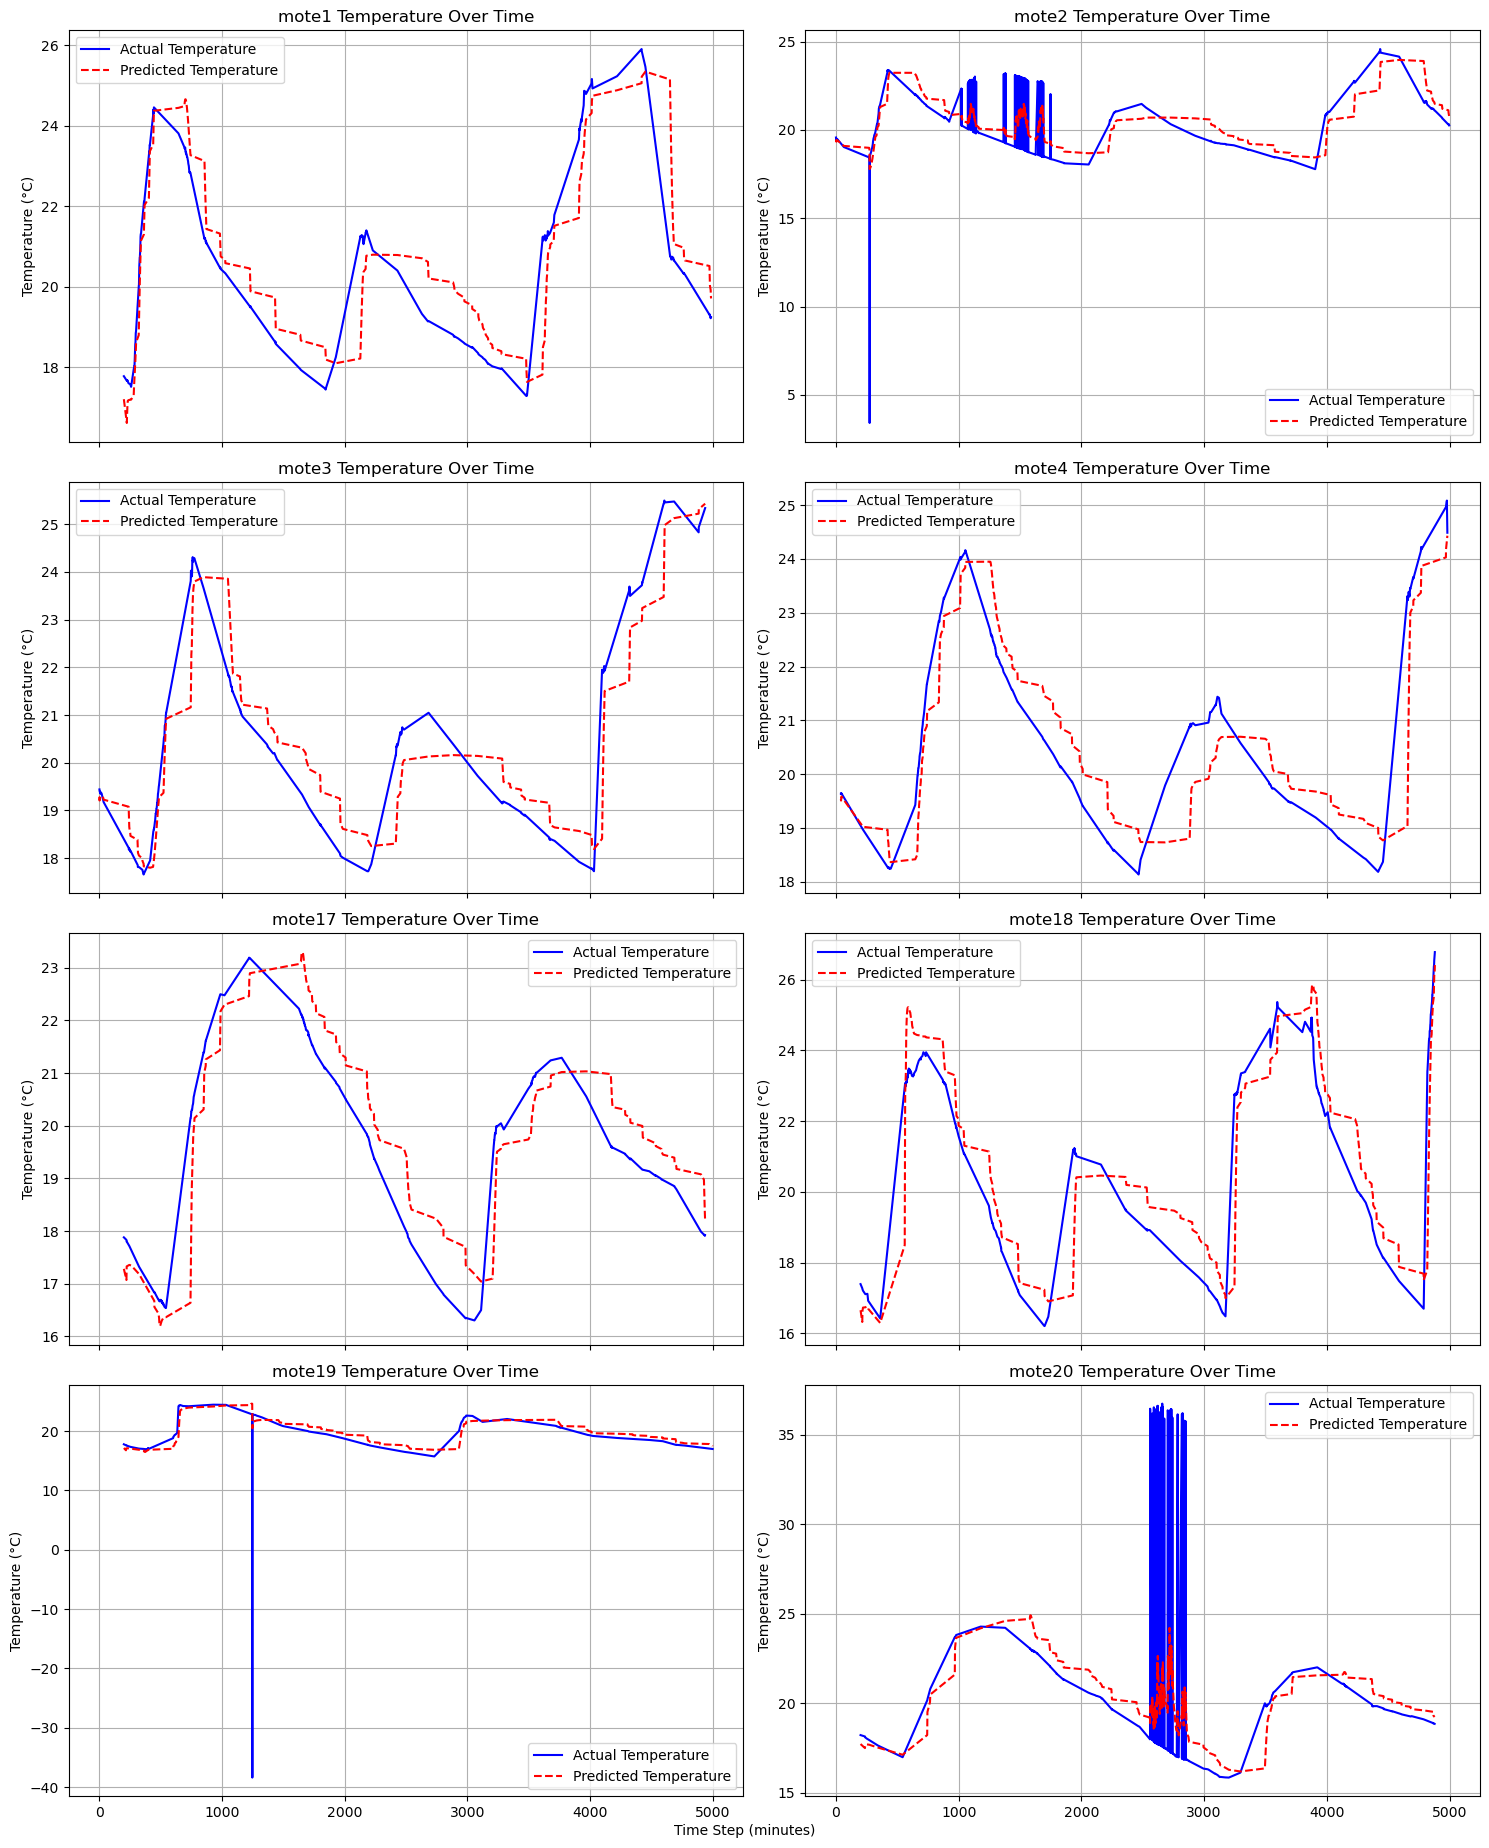

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming valuable_sensor_df is your DataFrame with columns: 'index', 'selected_moteid', 'temperature', 'predicted_temperature'

# Plot the actual and predicted temperatures for each mote
fig, axs = plt.subplots(4, 2, figsize=(15, 20), sharex=True)

# List of the first 4 and last 4 motes to plot
motes_to_plot = ['mote1', 'mote2', 'mote3', 'mote4', 'mote17', 'mote18', 'mote19', 'mote20']

for i, mote in enumerate(motes_to_plot):
    row = i // 2
    col = i % 2
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[row, col].plot(mote_data['index'], mote_data['temperature'], 'b-', label='Actual Temperature')
    axs[row, col].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label='Predicted Temperature')
    axs[row, col].set_title(f'{mote} Temperature Over Time')
    axs[row, col].set_ylabel('Temperature (°C)')
    axs[row, col].legend()
    axs[row, col].grid(True)

fig.text(0.5, 0.04, 'Time Step (minutes)', ha='center')
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.show()

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_top_20_df.csv', index=False)


Force pulling mote: mote11 at time step: 1267
Force pulling mote: mote12 at time step: 1267
Force pulling mote: mote13 at time step: 1267
Force pulling mote: mote14 at time step: 1267
Force pulling mote: mote15 at time step: 1267
Force pulling mote: mote16 at time step: 1267
Force pulling mote: mote17 at time step: 1267
Force pulling mote: mote18 at time step: 1267
Force pulling mote: mote19 at time step: 1267
Force pulling mote: mote20 at time step: 1267
Force pulling mote: mote11 at time step: 1467
Force pulling mote: mote12 at time step: 1467
Force pulling mote: mote13 at time step: 1467
Force pulling mote: mote14 at time step: 1467
Force pulling mote: mote15 at time step: 1467
Force pulling mote: mote16 at time step: 1467
Force pulling mote: mote17 at time step: 1467
Force pulling mote: mote18 at time step: 1467
Force pulling mote: mote19 at time step: 1467
Force pulling mote: mote20 at time step: 1467
Force pulling mote: mote11 at time step: 1667
Force pulling mote: mote12 at time

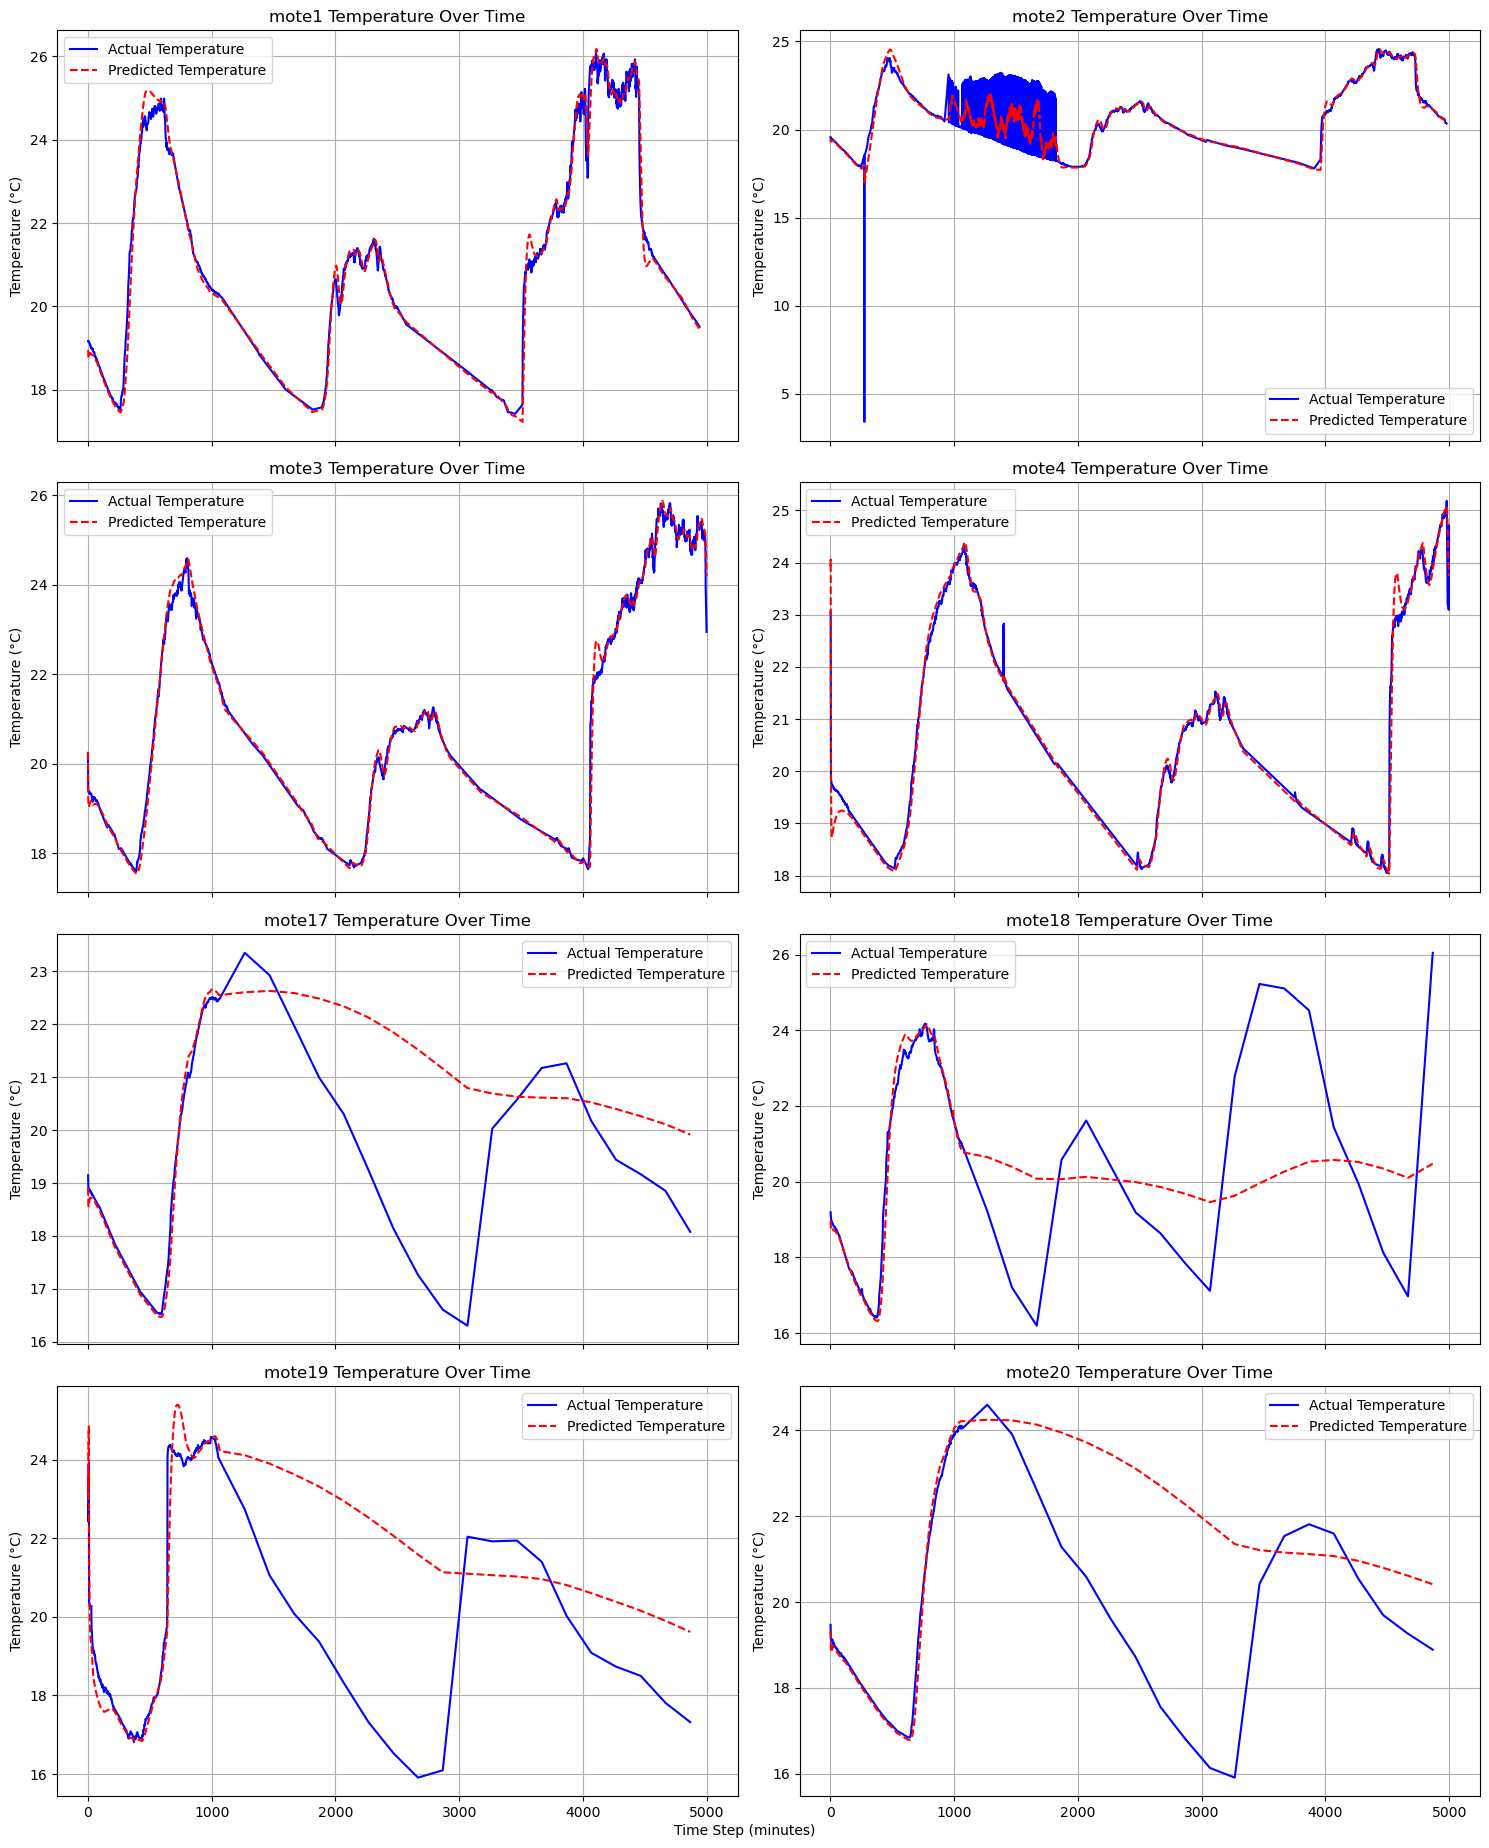

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the pivot DataFrame
pivot_df = result_df.head(5000)

# Parameters
A = np.array([[1, 1], [0, 1]])       # State transition matrix with delta_t=32 seconds
H = np.array([[1, 0]])                # Measurement matrix
Q = np.array([[1e-5, 0], [0, 1e-5]])  # Process noise covariance
R = np.array([[2]])                   # Measurement noise covariance
epsilon = 0.05                        # Sensitivity threshold for event detection
theta = 0.05                          # Threshold for significant change
num_nodes_to_poll = 10                 # Number of nodes to poll at each timestep
force_pull_threshold = 200             # Forcefully pull a node if it hasn't been pulled in the last 10 time steps

# Energy parameters in Joules
E_max = 162000  # Battery capacity in Joules
E_t = 50 / 1000  # Transmission energy in Joules
E_s = 10 / 1000  # Sensing energy in Joules
E_w = 10 / 1000  # Wake-up energy in Joules
E_0 = 1 / 1000   # Sleep energy in Joules

# Initialize state estimates and rate of change for each mote
state_estimates = {f'mote{i}': np.array([[20], [0.01]]) for i in range(1, 21)}
P = {f'mote{i}': np.eye(2) * 6 for i in range(1, 21)}

# Initialize previous timestamps for delta time calculation
last_sensed_values = {f'mote{i}': 20.0 for i in range(1, 21)}
last_update_times = {f'mote{i}': 0 for i in range(1, 21)}

# Initialize a list to store the most valuable sensor data and the associated metadata
valuable_sensor_data = []

# Initialize tracking arrays
polled_count = {f'mote{i}': 0 for i in range(1, 21)}
transmitted_count = {f'mote{i}': 0 for i in range(1, 21)}

# Function to predict node state
def predict_node_state(x_hat, delta_t):
    return A @ x_hat

# Function to select sensors based on covariance trace
def select_top_nodes(state_estimates, P, num_nodes_to_poll, currently_polled_nodes):
    covariance_traces = {mote: np.trace(P[mote]) for mote in state_estimates}
    sorted_motes_by_trace = sorted(covariance_traces, key=covariance_traces.get, reverse=True)
    top_nodes = set(sorted_motes_by_trace[:num_nodes_to_poll])
    return top_nodes | currently_polled_nodes

# Simulation loop
for idx, row in pivot_df.iterrows():
    current_time_step = idx
    delta_t_global = current_time_step - min(last_update_times.values())
    
    currently_polled_nodes = set()

    # Check if any node needs to be forcefully pulled due to inactivity
    for mote, last_time in last_update_times.items():
        if current_time_step - last_time >= force_pull_threshold:
            currently_polled_nodes.add(mote)
            print(f"Force pulling mote: {mote} at time step: {current_time_step}")

    # Select the top nodes based on covariance trace
    top_sensors = select_top_nodes(state_estimates, P, num_nodes_to_poll, currently_polled_nodes)

    for mote in top_sensors:
        polled_count[mote] += 1
        measured_value = row[mote]
        previous_state = state_estimates[mote]
        previous_P = P[mote]
        delta_t = max(current_time_step - last_update_times[mote], 1)  # Default to 1 if first measurement

        # Prediction step
        xp = A @ previous_state
        Pp = A @ previous_P @ A.T + Q

        # Update step
        z = np.array([[measured_value]])
        K = Pp @ H.T @ np.linalg.inv(H @ Pp @ H.T + R)
        x_hat = xp + K @ (z - H @ xp)
        P_hat = Pp - K @ H @ Pp

        # Store the updated state estimates and covariance matrix
        state_estimates[mote] = x_hat
        P[mote] = P_hat

        predicted_measurement = predict_node_state(x_hat, delta_t)[0, 0]

        if abs(measured_value - predicted_measurement) > theta:
            transmitted_count[mote] += 1
            last_sensed_values[mote] = measured_value

            # Store the data
            valuable_sensor_data.append({
                'index': current_time_step,
                'selected_moteid': mote,
                'temperature': measured_value,
                'predicted_temperature': predicted_measurement,
                'time_elapsed': delta_t
            })

        # Mark this node as polled in the current iteration
        currently_polled_nodes.add(mote)

    # Update the last selected index for the most valuable mote
    for mote in top_sensors:
        last_update_times[mote] = current_time_step

# Convert the list to a DataFrame
valuable_sensor_df = pd.DataFrame(valuable_sensor_data)

# Calculate the average MSE
valuable_sensor_df['squared_error'] = (valuable_sensor_df['temperature'] - valuable_sensor_df['predicted_temperature']) ** 2
average_mse = valuable_sensor_df['squared_error'].mean()
print(f'Average MSE: {average_mse}')

# Calculate polling and transmission fractions
time_steps = len(pivot_df)
fw = {mote: polled_count[mote] / time_steps for mote in polled_count}
ft = {mote: transmitted_count[mote] / time_steps for mote in transmitted_count}

# Calculate the average lifetime of sensors in hours and years
average_lifetime_hours = np.mean([
    E_max / (ft[mote] * E_t + fw[mote] * (E_s + 3 * E_w) + (1 - fw[mote]) * E_0) for mote in polled_count
]) / 3600

average_lifetime_years = average_lifetime_hours / 8760  # Convert hours to years
print("Average sensor lifetime (years):", average_lifetime_years)

# Plot the actual and predicted temperatures for each mote
fig, axs = plt.subplots(4, 2, figsize=(15, 20), sharex=True)

motes_to_plot = ['mote1', 'mote2', 'mote3', 'mote4', 'mote17', 'mote18', 'mote19', 'mote20']
for i, mote in enumerate(motes_to_plot):
    row = i // 2
    col = i % 2
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[row, col].plot(mote_data['index'], mote_data['temperature'], 'b-', label='Actual Temperature')
    axs[row, col].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label='Predicted Temperature')
    axs[row, col].set_title(f'{mote} Temperature Over Time')
    axs[row, col].set_ylabel('Temperature (°C)')
    axs[row, col].legend()
    axs[row, col].grid(True)

fig.text(0.5, 0.04, 'Time Step (minutes)', ha='center')
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.show()

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_top_20_df.csv', index=False)


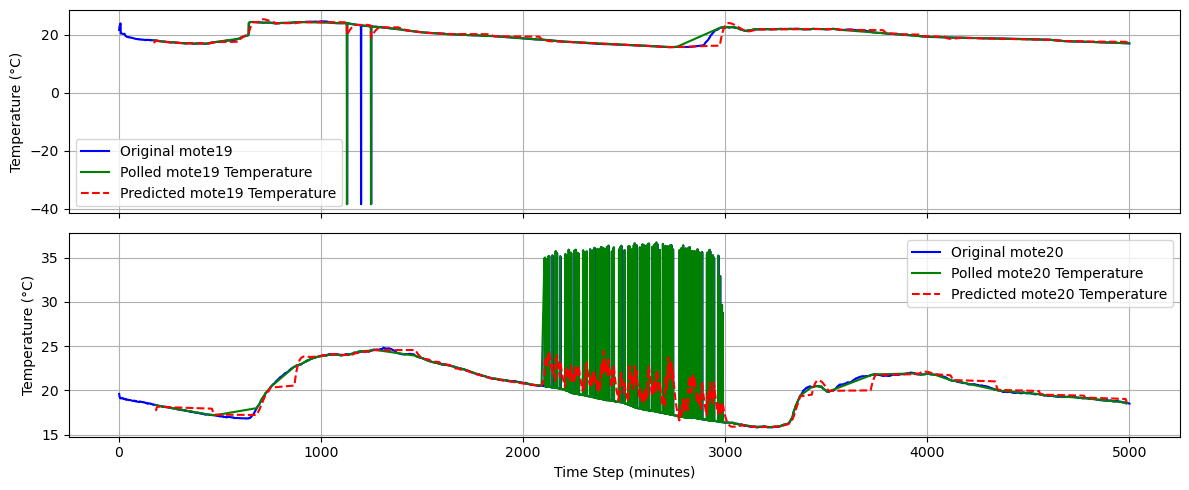

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming result_df contains the original data
# Assuming valuable_sensor_df contains the data from the sink end
#['mote1', 'mote2', 'mote3', 'mote4', 'mote17', 'mote18', 'mote19', 'mote20']
# Plotting the temperature values for each mote in separate subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

for i, mote in enumerate(['mote19', 'mote20']):
    # Plot original data from the node end
    axs[i].plot(result_df['SN'], result_df[mote], 'b-', label=f'Original {mote}')
    
    # Plot data collected from the sink end
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[i].plot(mote_data['index'], mote_data['temperature'], 'g-', label=f'Polled {mote} Temperature')
    axs[i].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label=f'Predicted {mote} Temperature')
    
    axs[i].set_ylabel('Temperature (°C)')
    #axs[i].set_title(f'{mote} Temperature Over Time')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Time Step (minutes)')
plt.tight_layout()
plt.show()
